# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

4. Выполнить 3 с помощью "протягиваемых" формул.

## Лабораторная работа 4.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [28]:
import pandas as pd
reviews = pd.read_csv('reviews_sample.csv')

reviews = reviews.rename(columns={'Unnamed: 0': 'id'})
reviews = reviews.set_index('id')

reviews.head()

,user_id,recipe_id,date,rating,review
id,,,,,
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...


In [29]:
recipes = pd.read_csv('recipes_sample.csv')[['id', 'name', 'minutes', 'submitted', 'description', 'n_ingredients']]
recipes = recipes.set_index('id')
recipes.head()

,name,minutes,submitted,description,n_ingredients
id,,,,,
44123,george s at the cove black bean soup,90,2002-10-25,an original recipe created by chef scott meska...,18.0
67664,healthy for them yogurt popsicles,10,2003-07-26,my children and their friends ask for my homem...,NaN
38798,i can t believe it s spinach,30,2002-08-29,"these were so go, it surprised even me.",8.0
35173,italian gut busters,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
84797,love is in the air beef fondue sauces,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [30]:
reviews_sample = reviews.sample(frac=0.05)
recipes_sample = recipes.sample(frac=0.05)

with pd.ExcelWriter('recipes.xlsx', engine='openpyxl') as writer:
    reviews_sample.to_excel(writer, sheet_name='Отзывы')
    recipes_sample.to_excel(writer, sheet_name='Рецепты')


3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [31]:
import xlwings as xw
import pandas as pd

with xw.Book('recipes.xlsx') as wb:
    pass

XlwingsError: The interactive mode of xlwings is only supported on Windows and macOS. On Linux, you can use xlwings Server or xlwings Reader.

In [32]:
import pandas as pd

recipes = pd.read_excel('recipes.xlsx', sheet_name='Рецепты')

recipes['seconds_assign'] = recipes['minutes'] * 60

with pd.ExcelWriter('recipes.xlsx', engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    recipes.to_excel(writer, sheet_name='Рецепты', index=False)

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [33]:
from openpyxl import load_workbook

wb = load_workbook('recipes.xlsx')

sheet = wb['Рецепты']

last_col = sheet.max_column

sheet.cell(row=1, column=last_col + 1, value='seconds_formula')

for row in range(2, sheet.max_row + 1):
    sheet.cell(row=row, column=last_col + 1, value=f'=F{row}*60')

wb.save('recipes.xlsx')

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [5]:
from openpyxl import load_workbook
from openpyxl.styles import Font, Alignment

wb = load_workbook('recipes.xlsx')
sheet = wb['Рецепты']

bold_font = Font(bold=True)
center_alignment = Alignment(horizontal='center')

for col_name in ['seconds_assign', 'seconds_formula']:
    for cell in sheet[1]:
        if cell.value == col_name:
            cell.font = bold_font
            cell.alignment = center_alignment
            break

wb.save('recipes.xlsx')

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [35]:
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

wb = load_workbook('recipes.xlsx')
sheet = wb['Рецепты']

green_fill = PatternFill(start_color='00FF00', end_color='00FF00', fill_type='solid')
yellow_fill = PatternFill(start_color='FFFF00', end_color='FFFF00', fill_type='solid')
red_fill = PatternFill(start_color='FF0000', end_color='FF0000', fill_type='solid')

minutes_col = None
for cell in sheet[1]:
    if cell.value == 'minutes':
        minutes_col = cell.column
        break

if minutes_col:
    for row in range(2, sheet.max_row + 1):
        cell = sheet.cell(row=row, column=minutes_col)
        minutes = cell.value
        
        if minutes is not None:
            if minutes < 5:
                cell.fill = green_fill
            elif 5 <= minutes <= 10:
                cell.fill = yellow_fill
            else:
                cell.fill = red_fill

wb.save('recipes.xlsx')

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [36]:
import pandas as pd
from openpyxl import load_workbook

recipes = pd.read_excel('recipes.xlsx', sheet_name='Рецепты')
reviews = pd.read_excel('recipes.xlsx', sheet_name='Отзывы')

recipe_review_counts = reviews['recipe_id'].value_counts()

recipes['n_reviews'] = recipes['id'].map(recipe_review_counts).fillna(0)

wb = load_workbook('recipes.xlsx')
sheet = wb['Рецепты']

last_col = sheet.max_column

sheet.cell(row=1, column=last_col + 1, value='n_reviews')

for row, count in enumerate(recipes['n_reviews'], start=2):
    sheet.cell(row=row, column=last_col + 1, value=count)

wb.save('recipes.xlsx')

## Лабораторная работа 4.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [3]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

def validate():
    reviews = pd.read_excel('recipes.xlsx', sheet_name='Отзывы')
    recipes = pd.read_excel('recipes.xlsx', sheet_name='Рецепты')
    
    valid_recipe_ids = set(recipes['id'])
    
    wb = load_workbook('recipes.xlsx')
    reviews_sheet = wb['Отзывы']
    
    red_fill = PatternFill(start_color='FF0000', end_color='FF0000', fill_type='solid')
    
    for row in range(2, reviews_sheet.max_row + 1):
        rating = reviews_sheet.cell(row=row, column=reviews.columns.get_loc('rating') + 1).value
        recipe_id = reviews_sheet.cell(row=row, column=reviews.columns.get_loc('recipe_id') + 1).value
        
        is_valid = (
            isinstance(rating, (int, float)) and 
            0 <= rating <= 5 and 
            recipe_id in valid_recipe_ids
        )
        
        if not is_valid:
            for col in range(1, reviews_sheet.max_column + 1):
                reviews_sheet.cell(row=row, column=col).fill = red_fill
    
    wb.save('recipes.xlsx')


validate()

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [1]:
import pandas as pd

columns = ['table', 'field', 'type', 'required', 'entity', 'description', 'key_type', 'ref_table', 'ref_field']

df = pd.read_csv('recipes_model.csv', sep='\t', names=columns, encoding='utf-8')

with pd.ExcelWriter('recipes_model.xlsx', engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='Модель', startrow=0, index=False)


from openpyxl import load_workbook
from openpyxl.styles import Font

wb = load_workbook('recipes_model.xlsx')
sheet = wb['Модель']

for cell in sheet[1]:
    cell.font = Font(bold=True)

wb.save('recipes_model.xlsx')

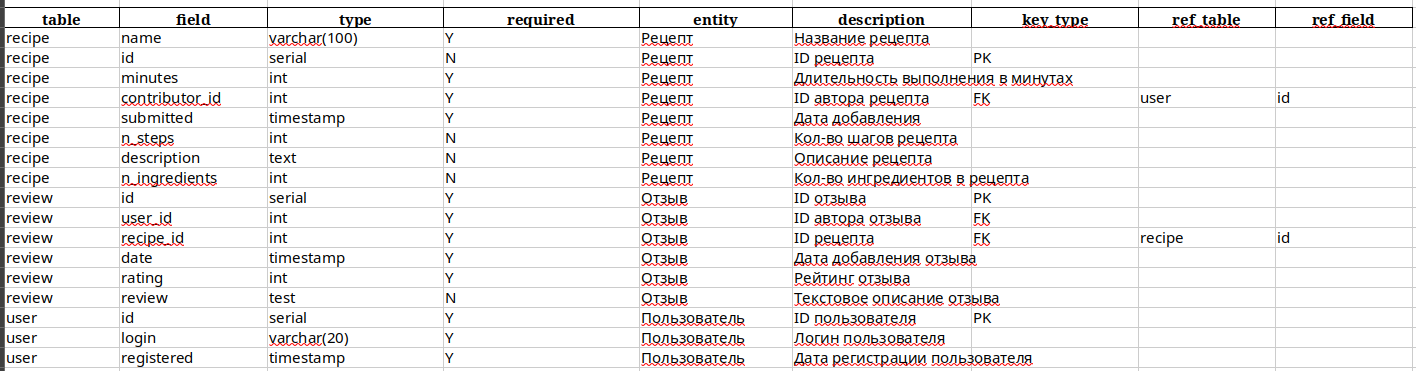

In [53]:
from IPython.display import Image
Image(filename='image.png')

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [6]:
wb = load_workbook('recipes_model.xlsx')
sheet = wb['Модель']

header_font = Font(bold=True)
header_fill = PatternFill(start_color='00CCFF', end_color='00CCFF', fill_type='solid')
center_alignment = Alignment(horizontal='center', vertical='center')

for row in sheet.iter_rows():
    for cell in row:
        if cell.row == 1:
            cell.font = header_font
            cell.fill = header_fill
        cell.alignment = center_alignment

for column in sheet.columns:
    max_length = 0
    column_letter = column[0].column_letter
    
    for cell in column:
        try:
            if len(str(cell.value)) > max_length:
                max_length = len(str(cell.value))
        except:
            pass
    
    adjusted_width = (max_length + 2) * 1.2
    sheet.column_dimensions[column_letter].width = adjusted_width

from openpyxl.styles import Border, Side
thin_border = Border(
    left=Side(style='thin'),
    right=Side(style='thin'),
    top=Side(style='thin'),
    bottom=Side(style='thin')
)

for row in sheet.iter_rows():
    for cell in row:
        cell.border = thin_border

sheet.auto_filter.ref = sheet.dimensions

wb.save('recipes_model.xlsx')

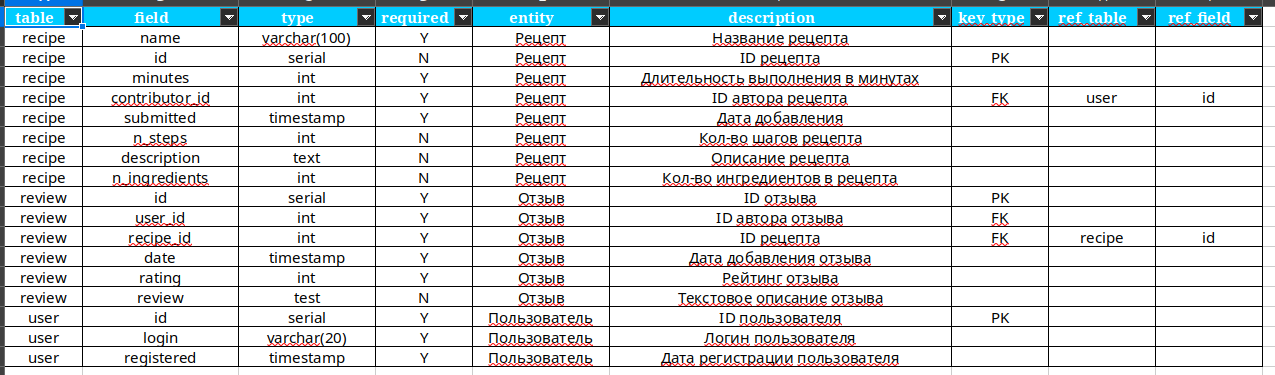

In [7]:
from IPython.display import Image
Image(filename='image copy.png')